In [1]:
import pandas as pd
import numpy as np
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from py3grads import Grads as GrADS
from datetime import datetime, timedelta
from metpy.units import units

In [2]:
# Model parameters
model='nam1hr'
runTime=datetime(2020, 5, 27, 12)
numOfFrames=37

# Location
name, latitude, longitude = 'Watkins Glen, NY', 42.43, -76.92

In [3]:
def getDataURL(model, runTime):
    if 'nam' in model:
        return f'http://nomads.ncep.noaa.gov/dods/nam/nam{runTime.strftime("%Y%m%d")}/{model}_{runTime.strftime("%Hz")}'
    elif 'hrrr' in model:
        return f'http://nomads.ncep.noaa.gov/dods/hrrr/hrrr{runTime.strftime("%Y%m%d")}/{model}_sfc.t{runTime.strftime("%Hz")}'
    elif 'hiresw' in model:
        return f'http://nomads.ncep.noaa.gov/dods/hiresw/hiresw{runTime.strftime("%Y%m%d")}/{model}_{runTime.strftime("%Hz")}'
    elif 'gfs' in model:
        return f'http://nomads.ncep.noaa.gov/dods/model/gfs{runTime.strftime("%Y%m%d")}/{model}_{runTime.strftime("%Hz")}'
    elif 'rap' in model:
        return f'http://nomads.ncep.noaa.gov/dods/rap/rap{runTime.strftime("%Y%m%d")}/{model}_{runTime.strftime("%Hz")}'  
    return None 

In [4]:
data_vars={'tmp2m':units.kelvin , 'dpt2m':units.kelvin, 'ugrd10m':units('m/s'), 'vgrd10m':units('m/s'), 'gustsfc':units('m/s'), 
           'prmslmsl':units('Pa'), 'acpcpsfc':units('mm')}
df = pd.DataFrame()

# Start GrADS
ga = GrADS(verbose=False)

# Load model data from NOMADS server
dataURL = getDataURL(model, runTime)
ga(f'sdfopen {dataURL}')

# Set location
ga(f'set lat {latitude}')
ga(f'set lon {longitude}')

for frame in range(numOfFrames):
    
    # Set Time
    validTime = runTime + timedelta(hours=frame)
    ga(f'set time {validTime.strftime("%HZ%d%b%Y")}')

    # Capture data
    data={'time':validTime}

    # Get data
    for var in data_vars:
        data[var] = float(ga.exp(var)) 
    
    # Added to dataframe
    df=df.append(data, ignore_index=True)

df

,acpcpsfc,dpt2m,gustsfc,prmslmsl,time,tmp2m,ugrd10m,vgrd10m
0,0.000000,291.663422,5.914100,102039.062500,2020-05-27 12:00:00,296.239166,0.143389,3.509606
1,0.000000,292.951996,5.292984,102026.414062,2020-05-27 13:00:00,297.456635,0.113522,3.768218
2,0.000000,293.059448,6.613905,101991.039062,2020-05-27 14:00:00,298.734894,0.075698,4.280350
3,0.000000,293.022278,5.973583,101975.937500,2020-05-27 15:00:00,299.600555,-0.065509,4.666673
4,0.000000,292.905731,6.594687,101974.945312,2020-05-27 16:00:00,300.037933,-0.177714,4.962184
5,0.000000,292.834869,6.713705,101984.484375,2020-05-27 17:00:00,300.618195,0.072711,5.100957
6,0.000000,292.319214,6.054240,101965.093750,2020-05-27 18:00:00,299.941742,0.252930,4.994295
7,0.000000,292.189514,6.440587,101958.296875,2020-05-27 19:00:00,299.513916,0.376599,5.110851
8,0.000000,291.999298,6.819882,101902.421875,2020-05-27 20:00:00,299.092255,0.713239,5.114413
9,0.000000,291.686127,6.418655,101881.281250,2020-05-27 21:00:00,298.392761,0.804487,4.701409


In [67]:
desired_units={'tmp2m':units.degF , 'dpt2m':units.degF, 'ugrd10m':units('mph'), 'vgrd10m':units('mph'), 'gustsfc':units('mph'), 
           'prmslmsl':units('hPa'), 'acpcpsfc':units('inches')}

# Change units
t=df['time']
T=(df['tmp2m'].values*data_vars['tmp2m']).to(desired_units['tmp2m'])
Td=(df['dpt2m'].values*data_vars['dpt2m']).to(desired_units['dpt2m'])
prcp=(df['acpcpsfc'].values*data_vars['acpcpsfc']).to(desired_units['acpcpsfc'])
mslp=(df['prmslmsl'].values*data_vars['prmslmsl']).to(desired_units['prmslmsl'])
windSpd=mpcalc.wind_speed(df['ugrd10m'].values*data_vars['ugrd10m'], df['vgrd10m'].values*data_vars['vgrd10m'])
windSpd=windSpd.to(desired_units['ugrd10m'])
windGst=(df['gustsfc'].values*data_vars['gustsfc']).to(desired_units['gustsfc'])
windDir=mpcalc.wind_direction(df['ugrd10m'].values*data_vars['ugrd10m'], df['vgrd10m'].values*data_vars['vgrd10m'])

# Get precip accumulation
prcp_accum=prcp
for i in range(len(prcp_accum)):
    if i > 0:
        prcp_accum[i] = prcp_accum[i] + prcp_accum[i-1]
        
# Check if wind gust > wind speed
for i in range(len(windGst)):
    if windGst[i] <= windSpd[i]:
        windGst[i] = np.NaN

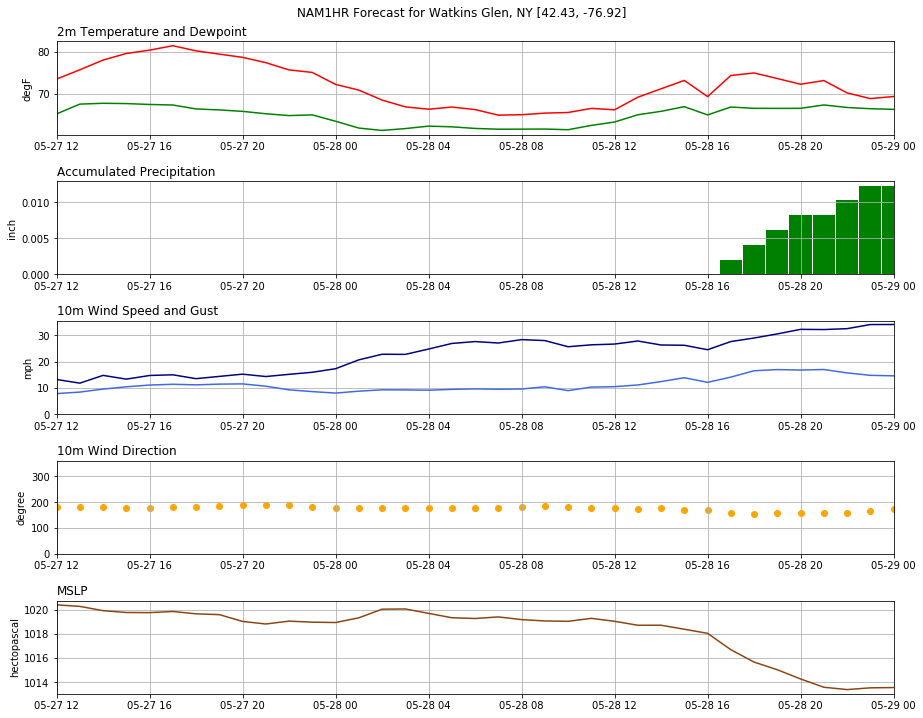

In [66]:
# Make Plot
axs=range(5)
fig, axs = plt.subplots(figsize=(15, 12), nrows=len(axs))
plt.subplots_adjust(hspace=0.5)

axs[0].plot(t, T, color='red')
axs[0].plot(t, Td, color='green')
axs[0].set_title('2m Temperature and Dewpoint', loc='left')

axs[1].bar(t, prcp_accum, color='green', width=0.04)
axs[1].set_ylim(bottom=0)
axs[1].set_title('Accumulated Precipitation', loc='left')

axs[2].plot(t, windSpd, color='royalblue')
axs[2].plot(t, windGst, color='navy')
axs[2].set_ylim(bottom=0)
axs[2].set_title('10m Wind Speed and Gust', loc='left')

axs[3].scatter(t, windDir, color='orange')
axs[3].set_ylim(0, 360)
axs[3].set_title('10m Wind Direction', loc='left')

axs[4].plot(t, mslp, color='saddlebrown')
axs[4].set_title('MSLP', loc='left')

for ax in axs:
    ax.set_xlim(t[0], t[len(t)-1]) 
    plt.setp(ax.get_xticklabels(), rotation=0)
    ax.grid()
    
plt.suptitle(f'{model.upper()} Forecast for {name} [{latitude}, {longitude}]', y=0.92)

plt.show()